   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

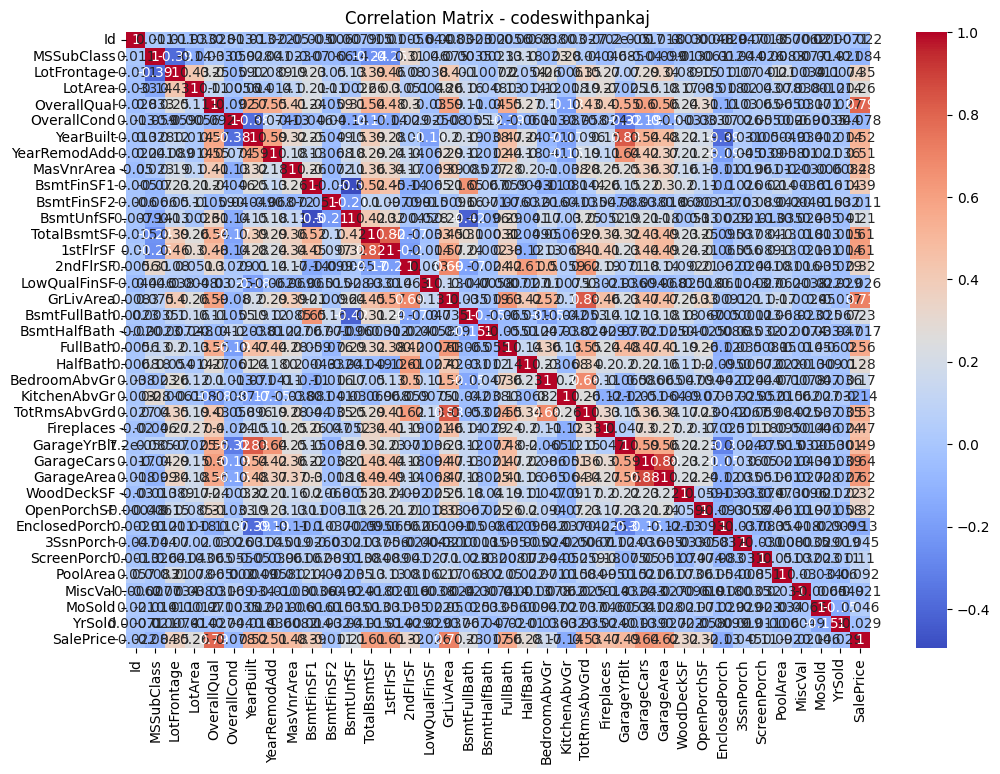

Missing values in train data:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64
Missing values in test data:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Exterior1st        1
Exterior2nd        1
To

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the dataset
train_data = pd.read_csv('https://raw.githubusercontent.com/Pankaj-Str/codeswithpankaj.com-Machine-Learning/main/Dataset/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/Pankaj-Str/codeswithpankaj.com-Machine-Learning/main/Dataset/house-prices-advanced-regression-techniques/test.csv')

# Display the first few rows of the dataset
print(train_data.head())

# Display the column names to verify 'SalePrice' exists
print("Columns in train_data:\n", train_data.columns)

# Check if 'SalePrice' is in the dataset
if 'SalePrice' not in train_data.columns:
    print("Error: 'SalePrice' column is missing from the dataset.")
else:
    # Correlation matrix
    plt.figure(figsize=(12, 8))
    numeric_features = train_data.select_dtypes(include=[np.number])
    correlation_matrix = numeric_features.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix - codeswithpankaj')
    plt.show()

    # Identify columns with missing values
    missing_values_train = train_data.isnull().sum()
    missing_values_train = missing_values_train[missing_values_train > 0].sort_values(ascending=False)
    print("Missing values in train data:\n", missing_values_train)

    missing_values_test = test_data.isnull().sum()
    missing_values_test = missing_values_test[missing_values_test > 0].sort_values(ascending=False)
    print("Missing values in test data:\n", missing_values_test)

    # Separate numeric and categorical columns
    numeric_cols_train = train_data.select_dtypes(include=[np.number]).columns
    categorical_cols_train = train_data.select_dtypes(exclude=[np.number]).columns

    numeric_cols_test = test_data.select_dtypes(include=[np.number]).columns
    categorical_cols_test = test_data.select_dtypes(exclude=[np.number]).columns

    # Fill missing values in numeric columns with median
    train_data[numeric_cols_train] = train_data[numeric_cols_train].fillna(train_data[numeric_cols_train].median())
    test_data[numeric_cols_test] = test_data[numeric_cols_test].fillna(test_data[numeric_cols_test].median())

    # Fill missing values in categorical columns with mode
    train_data[categorical_cols_train] = train_data[categorical_cols_train].fillna(train_data[categorical_cols_train].mode().iloc[0])
    test_data[categorical_cols_test] = test_data[categorical_cols_test].fillna(test_data[categorical_cols_test].mode().iloc[0])

    # Separate the target variable before one-hot encoding and aligning
    y_train = train_data['SalePrice']
    train_data = train_data.drop('SalePrice', axis=1)

    # One-hot encoding for categorical variables
    train_data = pd.get_dummies(train_data)
    test_data = pd.get_dummies(test_data)

    # Align the train and test data
    train_data, test_data = train_data.align(test_data, join='inner', axis=1)

    # Scale the features
    scaler = StandardScaler()
    train_data_scaled = scaler.fit_transform(train_data)
    test_data_scaled = scaler.transform(test_data)

    # Define the model
    ridge_model = Ridge(alpha=1.0)

    # Train the model
    ridge_model.fit(train_data_scaled, y_train)

    # Predictions
    train_predictions = ridge_model.predict(train_data_scaled)
    test_predictions = ridge_model.predict(test_data_scaled)

    # Evaluation
    mse = mean_squared_error(y_train, train_predictions)
    print(f'Ridge Regression MSE: {mse} - codeswithpankaj')
